In [3]:
import os
import glob
import PIL
import cv2
import random
import pickle
from PIL import Image
import numpy as np
from numpy import asarray
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow
import tensorflow as tf
from tensorflow.keras import layers
import keras 
from tensorflow.keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import weakref

%matplotlib inline

In [2]:
# Getting Current Directory

curr_path = os.getcwd()
curr_path

'C:\\Users\\ADMIN\\Tution\\Deep_learning\\DL_project\\img_detection'

In [7]:
# Reading the CSV file and making a DataFrame out of it

labels_dir = curr_path + r"\dataset\\cifar-10\trainLabels.csv"
data_df = pd.read_csv(labels_dir)

data_df

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
...,...,...
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile


In [8]:
# Total no of images per Label

total_value = data_df.label.value_counts().reset_index()
total_value

,label,count
0,frog,5000
1,truck,5000
2,deer,5000
3,automobile,5000
4,bird,5000
5,horse,5000
6,ship,5000
7,cat,5000
8,dog,5000
9,airplane,5000


In [27]:
# This Function gives the list of every images in the Directory

def sortKeyFunc(s):
    return int(os.path.basename(s)[:-4])

def get_image(training_type):
    img_path = glob.glob(curr_path + f'\\dataset\\cifar-10\\{training_type}\\{training_type}\\*.png')
    img_path.sort(key = sortKeyFunc)
    return img_path

In [10]:
# def get_image(training_type):
#     num = glob.glob(curr_path + f'\\dataset\\cifar-10\\{training_type}\\{training_type}\\*.png')
#     return img_path

In [22]:
img = get_image('train')
img.sort(key=sortKeyFunc)

In [28]:
# Getting the Train and Test Image using the function and adding the directory to DataFrame 

train_data = get_image('train')
test_data = get_image('test')   # Remake with better index
data_df['train_dir'] = train_data
data_df

,id,label,train_dir
0,1,frog,C:\Users\ADMIN\Tution\Deep_learning\DL_project...
1,2,truck,C:\Users\ADMIN\Tution\Deep_learning\DL_project...
2,3,truck,C:\Users\ADMIN\Tution\Deep_learning\DL_project...
3,4,deer,C:\Users\ADMIN\Tution\Deep_learning\DL_project...
4,5,automobile,C:\Users\ADMIN\Tution\Deep_learning\DL_project...
...,...,...,...
49995,49996,bird,C:\Users\ADMIN\Tution\Deep_learning\DL_project...
49996,49997,frog,C:\Users\ADMIN\Tution\Deep_learning\DL_project...
49997,49998,truck,C:\Users\ADMIN\Tution\Deep_learning\DL_project...
49998,49999,automobile,C:\Users\ADMIN\Tution\Deep_learning\DL_project...


In [50]:
# Inilizition of Test Image and no of Images

tot_test_image_size = 5000
test_data = test_data[:tot_test_image_size]
test_data

['C:\\Users\\ADMIN\\Tution\\Deep_learning\\DL_project\\img_detection\\dataset\\cifar-10\\test\\test\\1.png',
 'C:\\Users\\ADMIN\\Tution\\Deep_learning\\DL_project\\img_detection\\dataset\\cifar-10\\test\\test\\2.png',
 'C:\\Users\\ADMIN\\Tution\\Deep_learning\\DL_project\\img_detection\\dataset\\cifar-10\\test\\test\\3.png',
 'C:\\Users\\ADMIN\\Tution\\Deep_learning\\DL_project\\img_detection\\dataset\\cifar-10\\test\\test\\4.png',
 'C:\\Users\\ADMIN\\Tution\\Deep_learning\\DL_project\\img_detection\\dataset\\cifar-10\\test\\test\\5.png',
 'C:\\Users\\ADMIN\\Tution\\Deep_learning\\DL_project\\img_detection\\dataset\\cifar-10\\test\\test\\6.png',
 'C:\\Users\\ADMIN\\Tution\\Deep_learning\\DL_project\\img_detection\\dataset\\cifar-10\\test\\test\\7.png',
 'C:\\Users\\ADMIN\\Tution\\Deep_learning\\DL_project\\img_detection\\dataset\\cifar-10\\test\\test\\8.png',
 'C:\\Users\\ADMIN\\Tution\\Deep_learning\\DL_project\\img_detection\\dataset\\cifar-10\\test\\test\\9.png',
 'C:\\Users\\ADMIN\

In [42]:
# this Function return the List of names of Images from the List of All Image Location

# """
#     Example :

#             Input:
#                 '100006'

#             output:
#                 '100006.png'
# """

# # This Function add .png on the string and return it
# def append_ext(fn):
#     return str(fn)+".png"

"""
    Example :

        Input:
            ['C:\\Users\\ADMIN\\Tution\\Deep_learning\\DL_project\\img_detection\\cifar-10\\test\\test\\100006.png']

        output:
            ['100006']

"""
    
def get_names(arr):
    temp = []
    for i in arr:
        new_name = i.split('\\')[-1]
        temp.append(new_name)
    return temp

In [115]:
# making a DataFrame of id crossponding to its Directory

testdf = pd.DataFrame({
    'ids' : get_names(testing_dir),
    'test_dir' : testing_dir
    })
testdf

,ids,test_dir
0,1.png,C:\Users\ADMIN\Tution\Deep_learning\DL_project...
1,2.png,C:\Users\ADMIN\Tution\Deep_learning\DL_project...
2,3.png,C:\Users\ADMIN\Tution\Deep_learning\DL_project...
3,4.png,C:\Users\ADMIN\Tution\Deep_learning\DL_project...
4,5.png,C:\Users\ADMIN\Tution\Deep_learning\DL_project...
...,...,...
4995,4996.png,C:\Users\ADMIN\Tution\Deep_learning\DL_project...
4996,4997.png,C:\Users\ADMIN\Tution\Deep_learning\DL_project...
4997,4998.png,C:\Users\ADMIN\Tution\Deep_learning\DL_project...
4998,4999.png,C:\Users\ADMIN\Tution\Deep_learning\DL_project...


In [116]:
# Adding the ids in the DataFrame ids is basically the Image name in tata Location

data_df['ids'] = data_df.id.apply(append_ext)
# testdf['ids'] = testdf.id.apply(append_ext)
data_df

,id,label,train_dir,ids
0,1,frog,C:\Users\ADMIN\Tution\Deep_learning\DL_project...,1.png
1,2,truck,C:\Users\ADMIN\Tution\Deep_learning\DL_project...,2.png
2,3,truck,C:\Users\ADMIN\Tution\Deep_learning\DL_project...,3.png
3,4,deer,C:\Users\ADMIN\Tution\Deep_learning\DL_project...,4.png
4,5,automobile,C:\Users\ADMIN\Tution\Deep_learning\DL_project...,5.png
...,...,...,...,...
49995,49996,bird,C:\Users\ADMIN\Tution\Deep_learning\DL_project...,49996.png
49996,49997,frog,C:\Users\ADMIN\Tution\Deep_learning\DL_project...,49997.png
49997,49998,truck,C:\Users\ADMIN\Tution\Deep_learning\DL_project...,49998.png
49998,49999,automobile,C:\Users\ADMIN\Tution\Deep_learning\DL_project...,49999.png


In [55]:
# Getting the No of classes Name and Total No of Classes 

labels_val = np.array(data_df.label)
num_classes = len(np.unique(labels_val))
print(f'Total no of Classes : {num_classes}')
print(f'classes name : {np.unique(labels_val)}')

Total no of Classes : 10
classes name : ['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']


In [56]:
# Making a DataFrame of the idx with its Classes name 

label_dic = {}
for idx, i in enumerate(np.unique(labels_val)):
    label_dic[idx] = i
label_dic

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [86]:
def return_img(ids):
    return Image.open(curr_path + r"\\dataset\\cifar-10\\train\\train\\" + str(ids))

def random_get():
    return random.randrange(len(data_df))

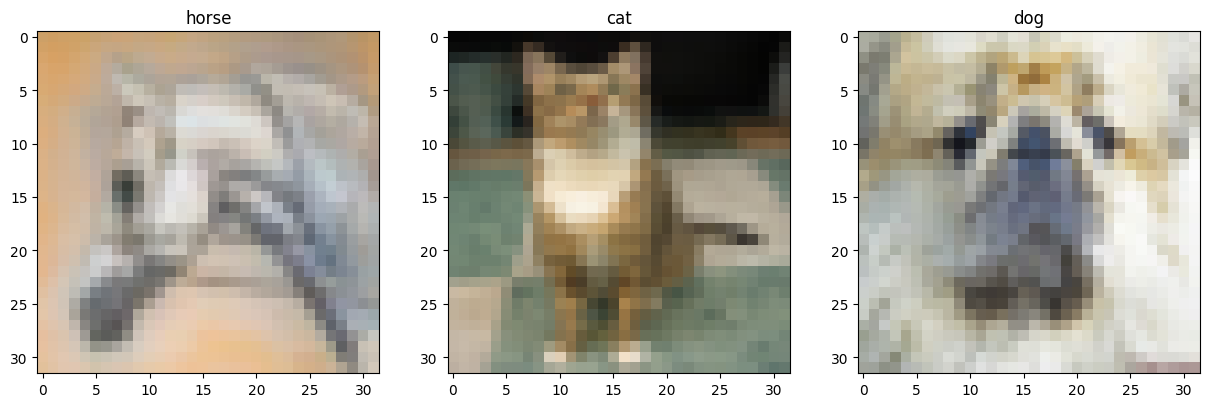

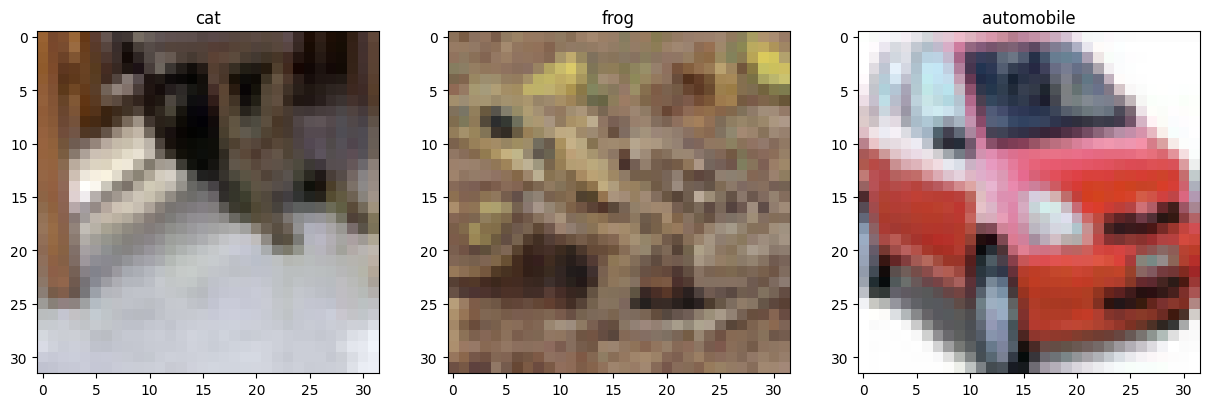

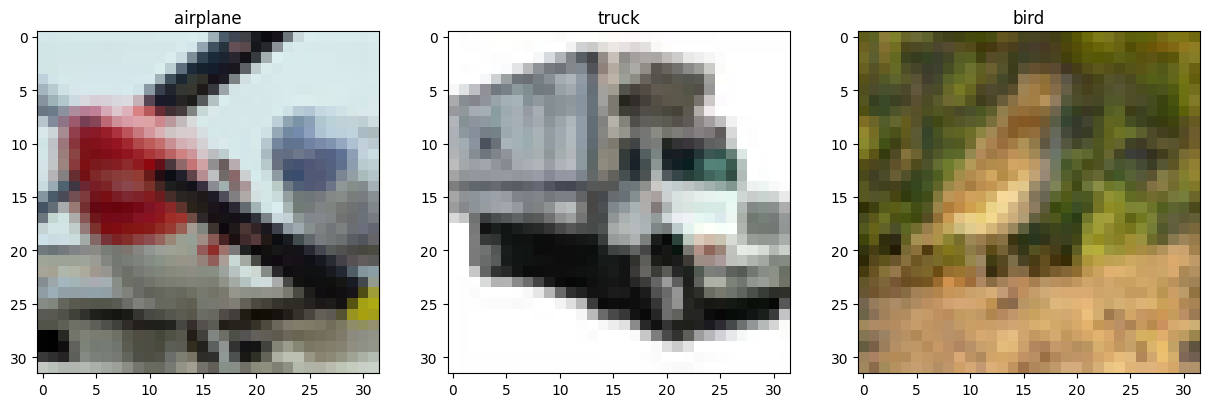

In [108]:
for i in range(3):
    plt.figure(figsize=(15,10));
    plt.subplot(231);
    one = random_get()
    plt.title(data_df['label'][one]);
    plt.imshow(return_img(data_df['ids'][one]));
    plt.subplot(232);
    two = random_get()
    plt.title(data_df['label'][two]);
    plt.imshow(return_img(data_df['ids'][two]));
    three = random_get()
    plt.subplot(233);
    plt.title(data_df['label'][three]);
    plt.imshow(return_img(data_df['ids'][three]));

In [117]:
# Inilization of the ImageSize, Batch_size 

img_size = 32
batch_size = 128

# Inilization of the Image Data Generator which make the image matrix value between 0 and 1 and also do validation split
datagen=ImageDataGenerator(rescale=1./255,
                          validation_split=0.2)


# Making the Train ,Valid and Testing Generator 
train_generator=datagen.flow_from_dataframe(
    dataframe=data_df,
    directory=curr_path + '\\dataset\\cifar-10\\train\\train\\',
    x_col="ids",
    y_col="label",
    subset="training",
    batch_size=batch_size,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(img_size,img_size))

valid_generator=datagen.flow_from_dataframe(
    dataframe=data_df,
    directory=curr_path + '\\dataset\\cifar-10\\train\\train\\',
    x_col="ids",
    y_col="label",
    subset="validation",
    batch_size=batch_size,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(img_size,img_size))

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
    dataframe=testdf,
    directory=curr_path + '\\dataset\\cifar-10\\test\\test\\',
    x_col="ids",
    y_col=None,
    batch_size=batch_size,
    seed=42,
    shuffle=False,
    class_mode=None,
    target_size=(img_size,img_size))

Found 40000 validated image filenames belonging to 10 classes.
Found 10000 validated image filenames belonging to 10 classes.
Found 5000 validated image filenames.


In [24]:
# Inilization of the Image Input Size for the Model

input_shape=(img_size,img_size,3)

In [121]:
# Defining the Model it is Xception Model

def entry_flow(inputs):

    x = layers.Conv2D(32, 3, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(64, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for size in [128, 256, 728]:
        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(size, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(size, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

        residual = layers.Conv2D(  # Project residual
            size, 1, strides=2, padding='same')(previous_block_activation)           
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    return x


def middle_flow(x, num_blocks=8):
  
    previous_block_activation = x

    for _ in range(num_blocks):
        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(728, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(728, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(728, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)

        x = layers.add([x, previous_block_activation])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    return x


def exit_flow(x, num_classes=10):
  
    previous_block_activation = x

    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(728, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(1024, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    residual = layers.Conv2D(  # Project residual
      1024, 1, strides=2, padding='same')(previous_block_activation)
    x = layers.add([x, residual])  # Add back residual

    x = layers.SeparableConv2D(1536, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.SeparableConv2D(2048, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 1:
        activation = 'sigmoid'
    else:
        activation = 'softmax'
    return layers.Dense(num_classes, activation=activation)(x)

In [122]:
# Making the Model and showing the summary of the model 

inputs = keras.Input(shape=(img_size, img_size, 3))
outputs = exit_flow(middle_flow(entry_flow(inputs)))
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 16, 16, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 16, 16, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 16, 16, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [123]:
# Adding Compile with the model

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [124]:
# Checking the No of GPU system has to train the Model

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [131]:
# Inilization of Callback which Save the Model in every 10 epochs depending of loss 

SAVE_PERIOD = 50

checkpoint_path =  'callback\Img_detection-{epoch:02d}-{val_loss:.2f}.hdf5' 

# Create a callback that saves the model's weights every 50 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    monitor='loss',
    period =SAVE_PERIOD,
    save_best_only=True)

In [132]:
# Starting the Training with 50 epochs

model_history = model.fit_generator(generator=train_generator,
                                    epochs=1000,
#                                     steps_per_epoch=batch_size,
                                    callbacks = cp_callback,
                                    validation_data=valid_generator)

Epoch 1/1000
313/313 [==============================] - 30s 95ms/step - loss: 0.5259 - accuracy: 0.8176 - val_loss: 1.8242 - val_accuracy: 0.5718
Epoch 2/1000
313/313 [==============================] - 30s 95ms/step - loss: 0.4368 - accuracy: 0.8484 - val_loss: 1.7877 - val_accuracy: 0.5742
Epoch 3/1000
313/313 [==============================] - 30s 95ms/step - loss: 0.3727 - accuracy: 0.8702 - val_loss: 1.1700 - val_accuracy: 0.6917
Epoch 4/1000
313/313 [==============================] - 30s 96ms/step - loss: 0.3074 - accuracy: 0.8924 - val_loss: 1.4539 - val_accuracy: 0.6417
Epoch 5/1000
313/313 [==============================] - 31s 98ms/step - loss: 0.2555 - accuracy: 0.9116 - val_loss: 1.6323 - val_accuracy: 0.6350
Epoch 6/1000
313/313 [==============================] - 31s 100ms/step - loss: 0.2181 - accuracy: 0.9244 - val_loss: 1.7636 - val_accuracy: 0.6317
Epoch 7/1000
313/313 [==============================] - 31s 100ms/step - loss: 0.1935 - accuracy: 0.9321 - val_loss: 1.2500

Epoch 56/1000
313/313 [==============================] - 32s 102ms/step - loss: 0.0313 - accuracy: 0.9894 - val_loss: 1.9041 - val_accuracy: 0.6985
Epoch 57/1000
313/313 [==============================] - 32s 102ms/step - loss: 0.0358 - accuracy: 0.9881 - val_loss: 1.5128 - val_accuracy: 0.7401
Epoch 58/1000
313/313 [==============================] - 32s 102ms/step - loss: 0.0340 - accuracy: 0.9890 - val_loss: 1.7148 - val_accuracy: 0.7072
Epoch 59/1000
313/313 [==============================] - 32s 102ms/step - loss: 0.0385 - accuracy: 0.9863 - val_loss: 1.7022 - val_accuracy: 0.7189
Epoch 60/1000
313/313 [==============================] - 32s 102ms/step - loss: 0.0310 - accuracy: 0.9894 - val_loss: 2.0597 - val_accuracy: 0.6986
Epoch 61/1000
313/313 [==============================] - 32s 102ms/step - loss: 0.0361 - accuracy: 0.9877 - val_loss: 1.3507 - val_accuracy: 0.7543
Epoch 62/1000
313/313 [==============================] - 32s 102ms/step - loss: 0.0314 - accuracy: 0.9893 - val_

313/313 [==============================] - 32s 102ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 1.6128 - val_accuracy: 0.7693
Epoch 165/1000
313/313 [==============================] - 32s 102ms/step - loss: 0.0144 - accuracy: 0.9948 - val_loss: 1.6311 - val_accuracy: 0.7659
Epoch 166/1000
313/313 [==============================] - 32s 102ms/step - loss: 0.0142 - accuracy: 0.9952 - val_loss: 1.6597 - val_accuracy: 0.7527
Epoch 167/1000
313/313 [==============================] - 32s 102ms/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 1.6205 - val_accuracy: 0.7647
Epoch 168/1000
313/313 [==============================] - 32s 102ms/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 1.9978 - val_accuracy: 0.7280
Epoch 169/1000
313/313 [==============================] - 32s 103ms/step - loss: 0.0114 - accuracy: 0.9961 - val_loss: 1.7632 - val_accuracy: 0.7401
Epoch 170/1000
313/313 [==============================] - 32s 102ms/step - loss: 0.0129 - accuracy: 0.9952 - val_loss: 1.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



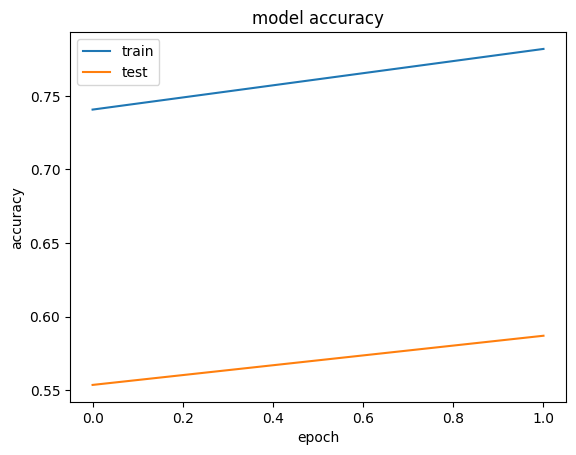

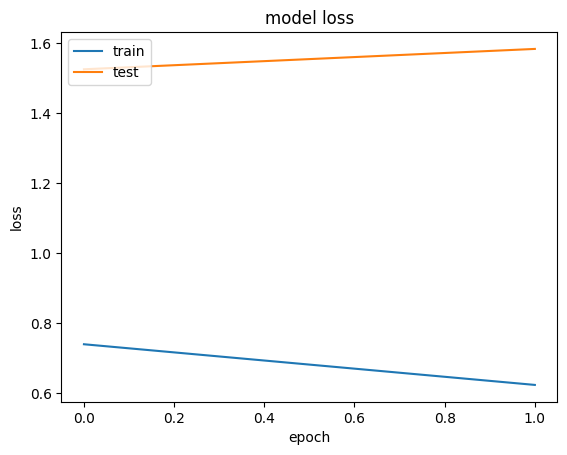

In [134]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [174]:
# Saving the Model for Further use 

model.save('image_seg_model_10class.h5')
print("Saved model to disk")

Saved model to disk


In [4]:
# Loading the Model back 

model = keras.models.load_model('image_seg_model_10class.h5')

In [179]:
# Predicting the test_generator

predicted = model.predict_generator(test_generator, verbose=1)

40/40 [==============================] - 3s 67ms/step


In [180]:
# using Argmax in the predicted data

predicted_max = np.argmax(predicted, axis=1)

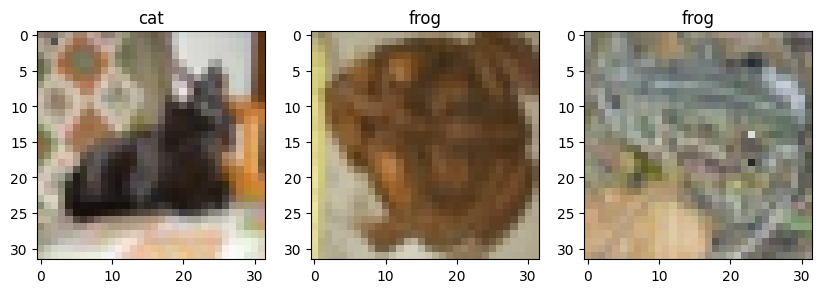

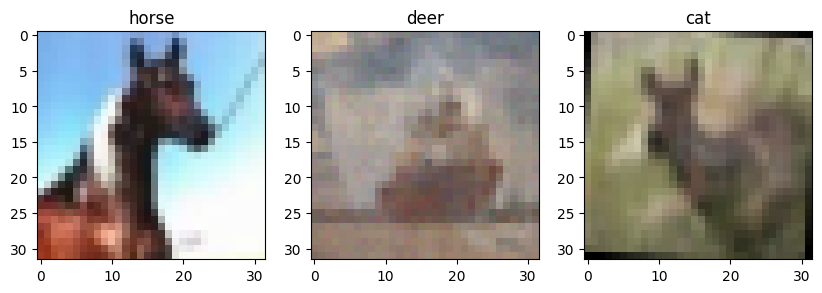

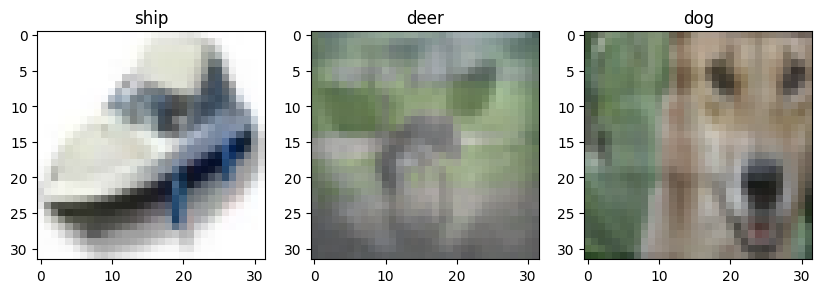

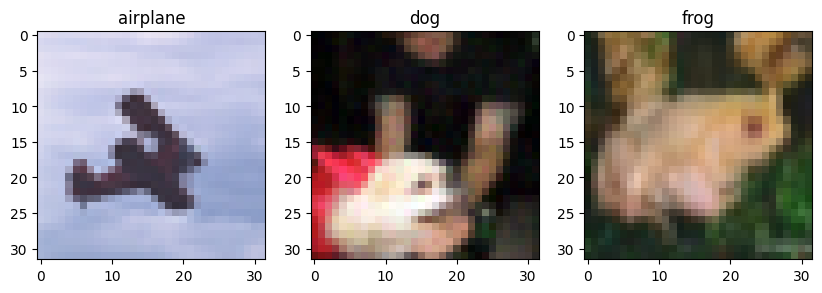

In [181]:
def read_img(idx):
    return plt.imread(pred_image_path[idx])

for i in range(4):
    plt.figure(figsize=(10,8));
    plt.subplot(231)
    rand =  random.randint(0, len(pred_image_path))
    plt.title(label_dic[predicted_max[rand]]);
    plt.imshow(Image.open(pred_image_path[rand]));
    plt.subplot(232)
    rand =  random.randint(0, len(pred_image_path))
    plt.title(label_dic[predicted_max[rand]]);
    plt.imshow(Image.open(pred_image_path[rand]));
    rand =  random.randint(0, len(pred_image_path))
    plt.subplot(233)
    plt.title(label_dic[predicted_max[rand]]);
    plt.imshow(Image.open(pred_image_path[rand]));

 output : airplane


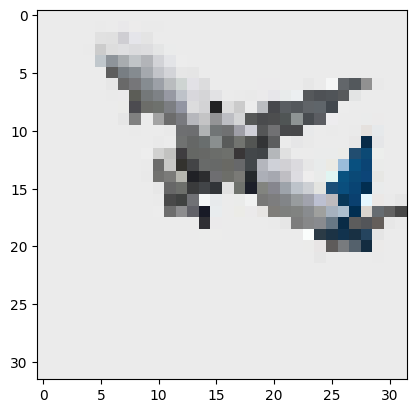

In [34]:
img = img_to_array(Image.open(r"C:\Users\ADMIN\Downloads\\download.jpeg"))
label_img = {0: 'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_CUBIC)
plt.imshow(array_to_img(img));  # Remove when Deploy in model
img = np.expand_dims(img, axis=0)
predicted = model.predict(img)
print(f" output : {label_img[int(np.argmax(predicted, axis=1))]}")

In [47]:
def predicted_img(loc):
    img = np.array(tf.keras.preprocessing.image.load_img(loc, target_size=(32, 32, 3)))
    label_img = {0: 'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
    img = np.expand_dims(img, axis=0)
    predicted = model.predict(img)
    return label_img[int(np.argmax(predicted, axis=1))]

In [48]:
predicted_img(r"C:\Users\ADMIN\Downloads\\download.jpeg")

'airplane'